In [1]:
# Here is no non-micro gesture type

prompt = """You are an expert in human psychology, body language interpretation, and behavioral analysis. 
Your task is to map micro gestures to their most likely corresponding emotions based on psychological studies 
and real-world observations. Each micro gesture may indicate different emotions depending on context, 
but your goal is to determine the primary emotion that best matches each gesture in a general sense. 
If a gesture has multiple possible interpretations, choose the most dominant emotion associated with it.

### Instructions:
1. Analyze each micro gesture carefully, considering universal body language interpretations.
2. Assign the most likely emotion that corresponds to the gesture. Examples of emotions include:
   - Anxiety
   - Confidence
   - Nervousness
   - Fear
   - Anger
   - Excitement
   - Discomfort
   - Curiosity
   - Contempt
   - Indecision
   - Stress
   - Attraction
   - Boredom
   - Relaxation
   - Submission
   - Defensiveness
   - Dominance
3. If a micro gesture has multiple possible interpretations, choose the most statistically common 
   emotional state associated with it.
4. Provide the mappings in a structured format like this:

   **Micro Gesture → Corresponding Emotion**

---

### Micro Gesture Analysis:

#### Dataset: IMIGUE
- Turtle neck → [Emotion]
- Bulging face, deep breath → [Emotion]
- Touching hat → [Emotion]
- Touching or scratching head → [Emotion]
- Touching or scratching forehead → [Emotion]
- Rubbing eyes → [Emotion]
- Touching face → [Emotion]
- Touching ears → [Emotion]
- Biting nails → [Emotion]
- Touching jaw → [Emotion]
- Touching or scratching neck → [Emotion]
- Playing or adjusting hair → [Emotion]
- Buckle button, pulling shirt collar, adjusting tie → [Emotion]
- Touching or covering suprasternal notch → [Emotion]
- Scratching back → [Emotion]
- Folding arms → [Emotion]
- Dusting off clothes → [Emotion]
- Putting arms behind body → [Emotion]
- Moving torso → [Emotion]
- Sitting straightly → [Emotion]
- Scratching or touching arms → [Emotion]
- Rubbing or holding hands → [Emotion]
- Crossing fingers → [Emotion]
- Minaret gesture → [Emotion]
- Playing or manipulating objects → [Emotion]
- Hold back arms → [Emotion]
- Head up → [Emotion]
- Pressing lips → [Emotion]
- Arms akimbo → [Emotion]
- Shaking shoulders → [Emotion]

#### Dataset: SMG
- Turtling neck and shoulder → [Emotion]
- Rubbing eyes and forehead → [Emotion]
- Folding arms → [Emotion]
- Touching or covering suprasternal notch → [Emotion]
- Moving legs → [Emotion]
- Touching or scratching neck → [Emotion]
- Folding arms behind body → [Emotion]
- Rubbing hands and crossing fingers → [Emotion]
- Arms akimbo → [Emotion]
- Crossing legs → [Emotion]
- Scratching some part of body → [Emotion]
- Scratching or touching facial parts other than eyes → [Emotion]
- Playing or adjusting hair → [Emotion]
- Holding arms → [Emotion]
- Pulling shirt collar → [Emotion]
- Playing with jewelry, and manipulating other objects → [Emotion]
- Illustrative hand gestures → [Emotion]

End of task. Provide a comprehensive list with accurate emotional mappings. Avoid vague responses. 
Think critically before assigning each emotion.
"""

In [2]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

completion = client.chat.completions.create(
  model="deepseek/deepseek-r1:free",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ]
)
response = completion.choices[0].message.content
    
print(response)

**Micro Gesture → Corresponding Emotion**

#### Dataset: IMIGUE
- Turtle neck → Fear  
- Bulging face, deep breath → Anger  
- Touching hat → Nervousness  
- Touching or scratching head → Indecision  
- Touching or scratching forehead → Stress  
- Rubbing eyes → Discomfort  
- Touching face → Anxiety  
- Touching ears → Discomfort  
- Biting nails → Anxiety  
- Touching jaw → Anger  
- Touching or scratching neck → Anxiety  
- Playing or adjusting hair → Attraction  
- Buckle button, pulling shirt collar, adjusting tie → Anxiety  
- Touching or covering suprasternal notch → Fear  
- Scratching back → Discomfort  
- Folding arms → Defensiveness  
- Dusting off clothes → Contempt  
- Putting arms behind body → Confidence  
- Moving torso → Nervousness  
- Sitting straightly → Confidence  
- Scratching or touching arms → Anxiety  
- Rubbing or holding hands → Stress  
- Crossing fingers → Indecision  
- Minaret gesture → Dominance  
- Playing or manipulating objects → Anxiety  
- Hold bac

In [ ]:
import re

# Parsing logic
data = {}
current_category = None

lines = response.split("\n")
for line in lines:
    category_match = re.match(r"#### Dataset: (\w+)", line)
    gesture_match = re.match(r"- (.+) → (\w+)", line)

    if category_match:
        current_category = category_match.group(1)
        data[current_category] = {}

    elif gesture_match and current_category:
        gesture = gesture_match.group(1).strip()
        emotion = gesture_match.group(2).strip()
        data[current_category][gesture] = emotion.lower()

# Output structured dictionary
print(data)

In [4]:
import json

with open('data.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

## Loading and vizualization

In [34]:
import json

with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [14]:
df = pd.read_csv(file_path, sep = '\t', header=None, names=["word", "x", "y", "z"])

In [32]:
df_imigue = set(list(mapping['IMIGUE'].values()))

AttributeError: 'dict_values' object has no attribute 'lower'

In [38]:
def parse_emotion_mapping(dataset_dict):
    """
    Parses a nested dictionary of datasets where each dataset contains micro gestures and their corresponding emotions.
    
    :param dataset_dict: Dictionary {dataset_name: {gesture: emotion}}
    :return: Flattened dictionary {gesture: emotion}
    """

    

    return word_to_emotion

In [40]:
parse_emotion_mapping(data)

AttributeError: 'str' object has no attribute 'items'

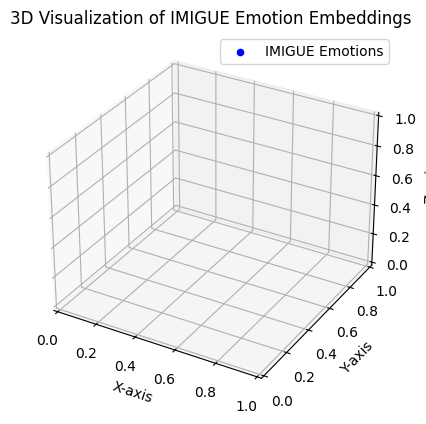

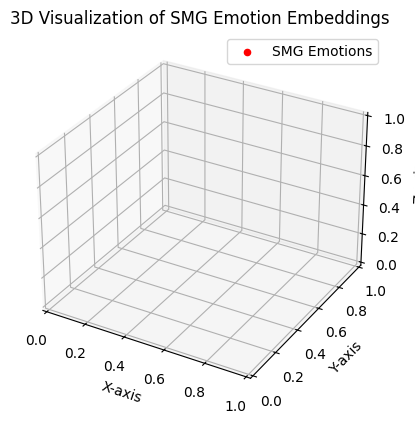

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mapping = {key: value.lower() if isinstance(value, str) else value for key, value in data.items()}

# Read the text file
file_path = "NRC-VAD-Lexicon.txt"
df = pd.read_csv(file_path, sep = '\t', header=None, names=["word", "x", "y", "z"])

# Normalize words for better mapping (convert to lowercase)
# df["word"] = df["word"].str.lower()

# Create a new column that maps words to emotions
def map_to_emotion(word):
    for dataset in mapping.values():
        if word in dataset:
            return dataset[word]
    return None  # If the word is not found in our datasets

df["emotion"] = df["word"].apply(map_to_emotion)

# Filter the data for emotions
df_filtered = df.dropna(subset=["emotion"])

# Separate IMIGUE and SMG datasets
df_imigue = df_filtered[df_filtered["emotion"].isin(mapping["IMIGUE"].values())]
df_smg = df_filtered[df_filtered["emotion"].isin(mapping["SMG"].values())]

# Plot 3D Embeddings for IMIGUE
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_imigue["x"], df_imigue["y"], df_imigue["z"], c='blue', label="IMIGUE Emotions")
ax.set_title("3D Visualization of IMIGUE Emotion Embeddings")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

# Plot 3D Embeddings for SMG
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_smg["x"], df_smg["y"], df_smg["z"], c='red', label="SMG Emotions")
ax.set_title("3D Visualization of SMG Emotion Embeddings")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()

In [28]:
list(mapping.values())[0]

{'Turtle neck': 'Fear',
 'Bulging face, deep breath': 'Anger',
 'Touching hat': 'Nervousness',
 'Touching or scratching head': 'Indecision',
 'Touching or scratching forehead': 'Stress',
 'Rubbing eyes': 'Discomfort',
 'Touching face': 'Anxiety',
 'Touching ears': 'Discomfort',
 'Biting nails': 'Anxiety',
 'Touching jaw': 'Anger',
 'Touching or scratching neck': 'Anxiety',
 'Playing or adjusting hair': 'Attraction',
 'Buckle button, pulling shirt collar, adjusting tie': 'Anxiety',
 'Touching or covering suprasternal notch': 'Fear',
 'Scratching back': 'Discomfort',
 'Folding arms': 'Defensiveness',
 'Dusting off clothes': 'Contempt',
 'Putting arms behind body': 'Confidence',
 'Moving torso': 'Nervousness',
 'Sitting straightly': 'Confidence',
 'Scratching or touching arms': 'Anxiety',
 'Rubbing or holding hands': 'Stress',
 'Crossing fingers': 'Indecision',
 'Minaret gesture': 'Dominance',
 'Playing or manipulating objects': 'Anxiety',
 'Hold back arms': 'Submission',
 'Head up': 'Con

## Legacy

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="<OPENROUTER_API_KEY>",
)

completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
  },
  model="google/gemini-2.0-flash-thinking-exp:free",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What's in this image?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
          }
        }
      ]
    }
  ]
)
print(completion.choices[0].message.content)

In [ ]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="<OPENROUTER_API_KEY>",
)

completion = client.chat.completions.create(
  extra_headers={
    "HTTP-Referer": "<YOUR_SITE_URL>", # Optional. Site URL for rankings on openrouter.ai.
    "X-Title": "<YOUR_SITE_NAME>", # Optional. Site title for rankings on openrouter.ai.
  },
  model="deepseek/deepseek-r1:free",
  messages=[
    {
      "role": "user",
      "content": "What is the meaning of life?"
    }
  ]
)
print(completion.choices[0].message.content)

In [5]:
import os
os.environ.get("OPENAI_API_KEY")

In [ ]:
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